In [90]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2

In [3]:
import glob

In [96]:
files = glob.glob('/home/pmcroot/data1/2016-08-20_50mm_star_focus_test_650ms/*focus_step_0009.npz')
files.sort()

In [97]:
files[-1]

'/home/pmcroot/data1/2016-08-20_50mm_star_focus_test_650ms/2016-08-20_234111_focus_step_0009.npz'

In [98]:
im = np.load(files[-1])['image']

In [131]:
np.arcsin(3/50.)*180/np.pi

3.4398127675151962

In [37]:
im.shape

(3232, 4864)

In [86]:
x,y  = np.unravel_index(im.flatten().argsort()[-10],im.shape)
star = im[x-64:x+64,y-64:y+64]
print x,y

2694 3349


<IPython.core.display.Javascript object>


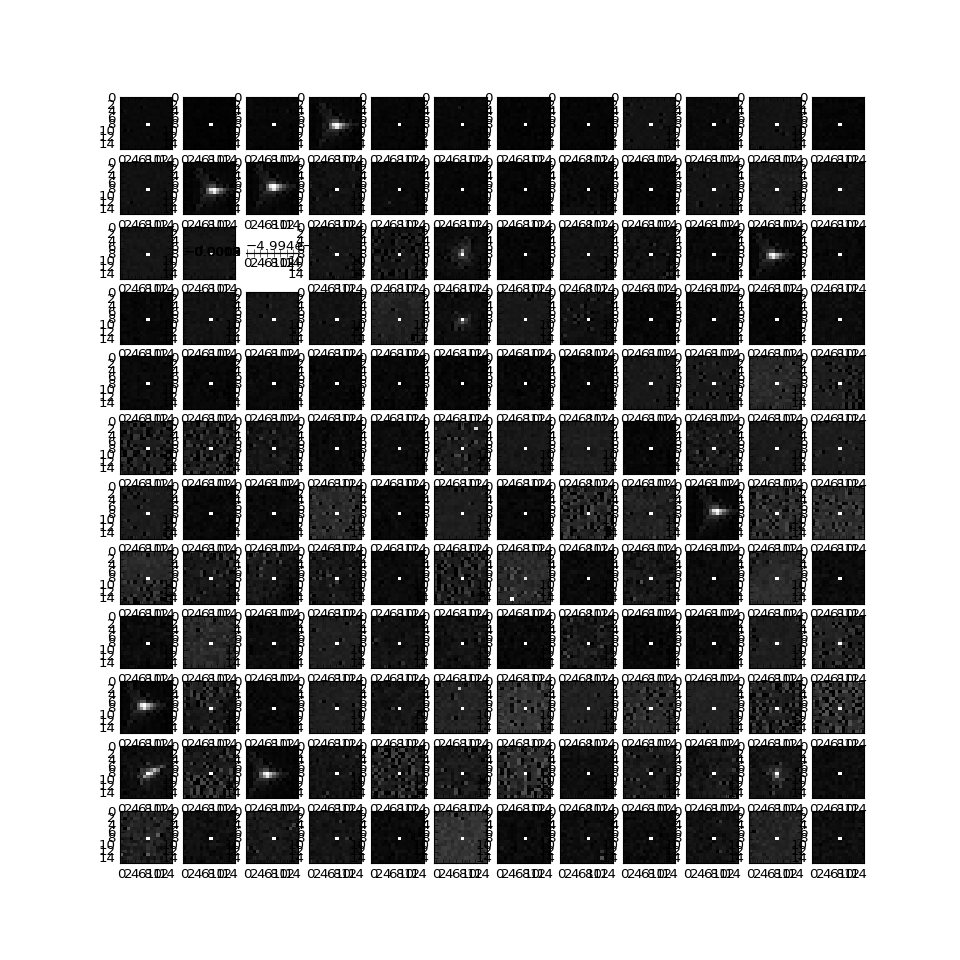

In [100]:
fig,axs = subplots(12,12,figsize=(12,12))
order = im.flatten().argsort()
for k,ax in enumerate(axs.flatten()):
    x,y  = np.unravel_index(order[-(k+1)],im.shape)
    star = im[x-8:x+8,y-8:y+8]
    ax.imshow(star,cmap=cm.gray,interpolation='nearest')

In [60]:
im.std()

165.72748760200309

In [46]:
import scipy.ndimage

<IPython.core.display.Javascript object>


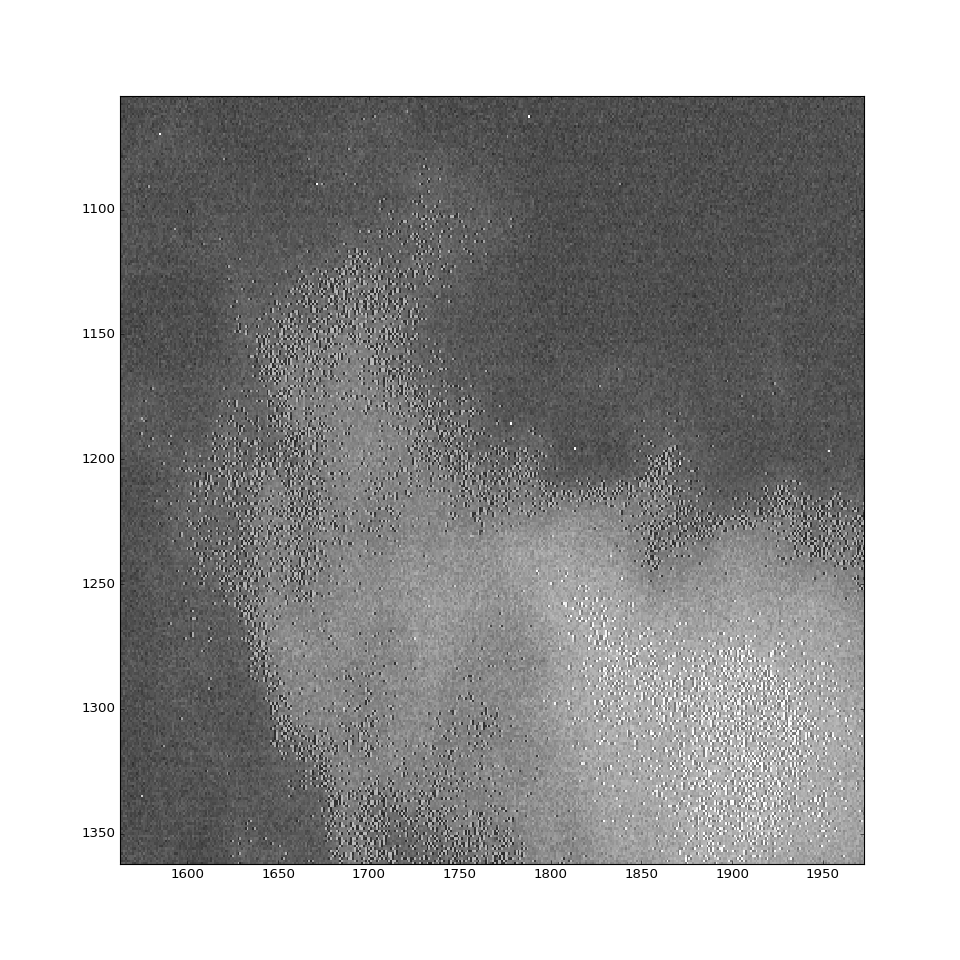

In [112]:
figure(figsize=(12,12))
#imshow(scipy.ndimage.gaussian_filter(im,2)[::4,::4],aspect='auto',interpolation='nearest',cmap=cm.gray)
imshow(im,aspect='auto',interpolation='nearest',cmap=cm.gray)
clim(100,1000)

In [125]:
figure(figsize=(12,12))
imshow(scipy.ndimage.gaussian_filter(im,1),aspect='auto',interpolation='nearest',cmap=cm.gray)
#imshow((im[1:,1:]+im[:-1,:-1])/2,aspect='auto',interpolation='nearest',cmap=cm.gray)
clim(100,1000)

<IPython.core.display.Javascript object>

TypeError: Invalid dimensions for image data

In [108]:
1700/4.

425.0

<IPython.core.display.Javascript object>


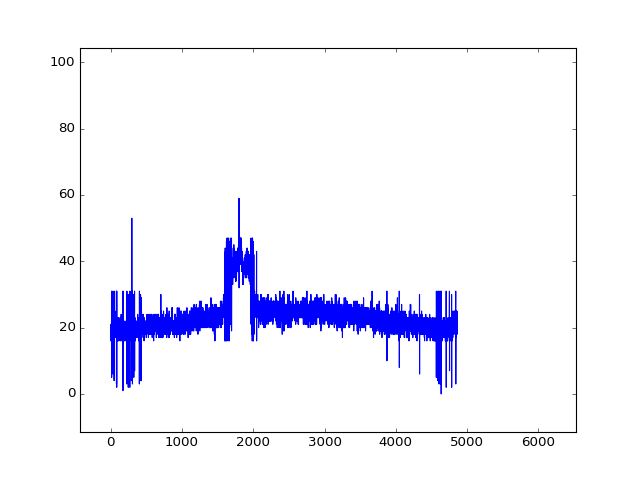

In [128]:
figure()
plot(im[1250,:]/16.)
#plot(scipy.ndimage.gaussian_filter(im,2)[1150,:]/16.)

<IPython.core.display.Javascript object>


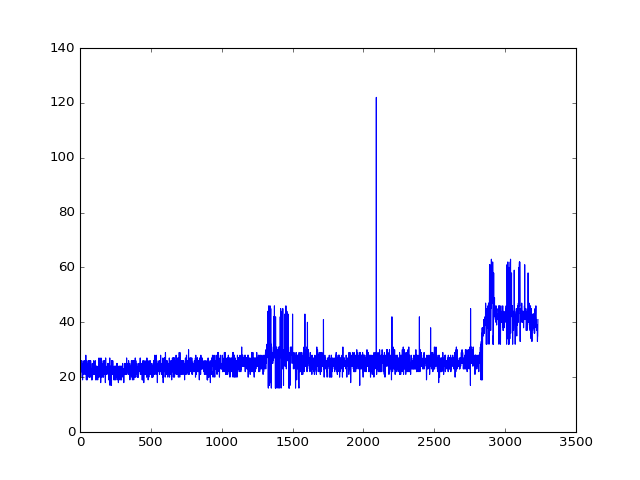

In [130]:
figure()
plot(im[:,2250]/16.)
#plot(scipy.ndimage.gaussian_filter(im,2)[1150,:]/16.)

In [118]:
bin?

In [121]:
for k in range(1625,1675):
    print '{:0>12}'.format(bin(im[1150,k]/16)[2:])

000000011101
000000011000
000000011100
000000011101
000000011010
000000011011
000000011111
000000101111
000000010100
000000011101
000000011111
000000011100
000000011100
000000101011
000000010000
000000011111
000000011110
000000011100
000000011111
000000010000
000000101110
000000011111
000000011011
000000011111
000000011000
000000010001
000000101110
000000101110
000000010000
000000100010
000000100100
000000011111
000000011011
000000011101
000000011110
000000101111
000000010000
000000100010
000000100011
000000100000
000000100000
000000011110
000000011101
000000100000
000000100100
000000101100
000000010001
000000100001
000000100010
000000100101


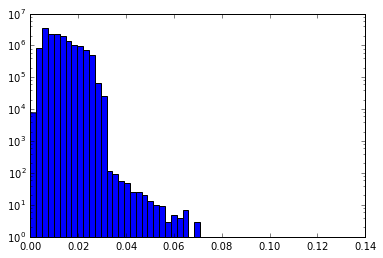

In [75]:
_= hist(im.flatten()/2.**16,bins=50,log=True)

In [240]:
#selm = np.zeros((5,5),dtype='bool')
selm = cv2.getGaussianKernel(8,sigma=2)
selm = np.outer(selm,selm)
selm = selm/selm.max()
selm[0,:] = -1
selm[:,0] = -1
selm[-1,:] = -1
selm[:,-1] = -1
selm = selm#/np.sum(selm,dtype='float')

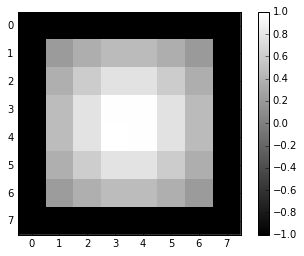

In [241]:
imshow(selm,interpolation='none',cmap=cm.gray)
colorbar()

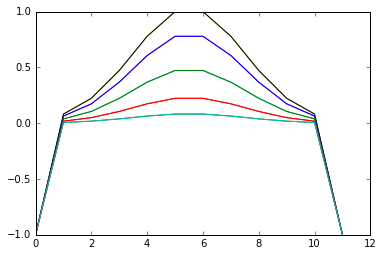

In [238]:
plot(selm)

In [102]:
level = cv2.filter2D(star,-1,selm,)

In [281]:
imlev =  cv2.filter2D(im.astype('int'),-1,selm,)

In [282]:
imlev.dtype

dtype('int32')

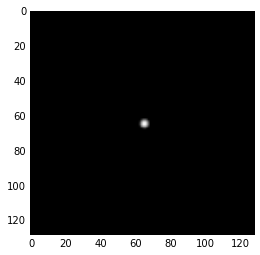

In [103]:
imshow(level,cmap=cm.gray)
#clim(0,1000)

In [114]:
imlev.shape

(3232, 4864)

In [118]:
3232/32.

101.0

In [283]:
cells = imlev.reshape((3232//32,32,4864//32,32))

In [120]:
cells.shape

(101, 32, 152, 32)

In [129]:
cells.max(1).max(2).flatten().argsort()[-2]

10155

In [135]:
%timeit np.unravel_index(cells.max(1).max(2).argmax(),(101,152))

10 loops, best of 3: 21.7 ms per loop


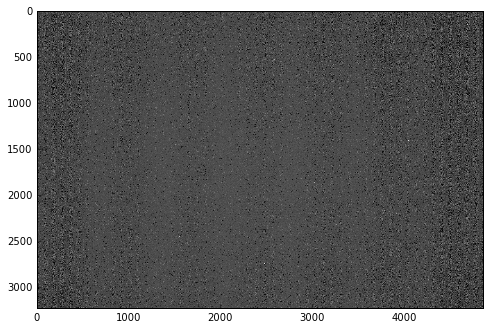

In [244]:
figure(figsize(8,8))
imshow(im,cmap=cm.gray)
clim(0,1000)

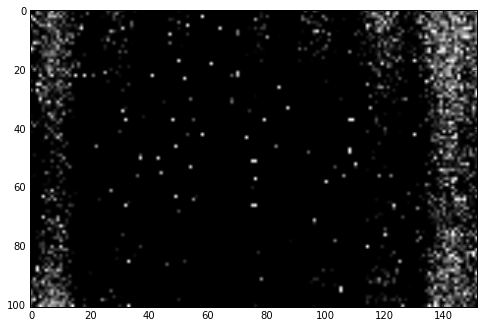

In [243]:
figure(figsize=(8,8))
imshow(cells.max(1).max(2),cmap=cm.gray)
clim(0,1000)

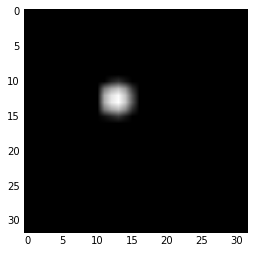

In [132]:
imshow(cells[66,:,123,:],cmap=cm.gray)

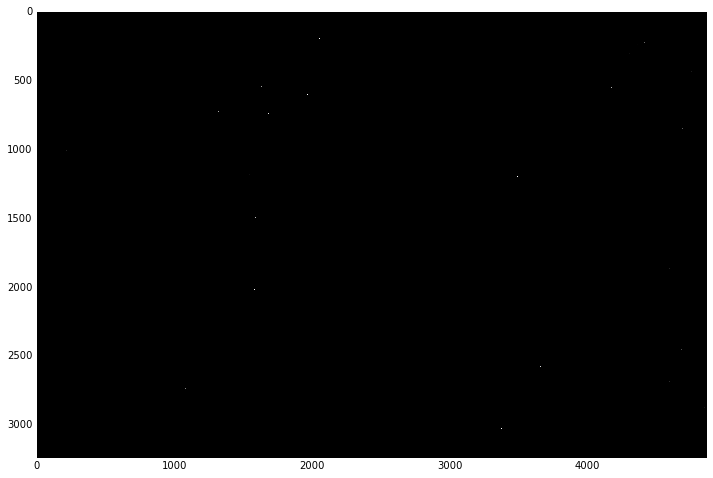

In [113]:
figure(figsize=(12,12))
imshow(imlev>1000,cmap=cm.gray)
#clim(0,1000)

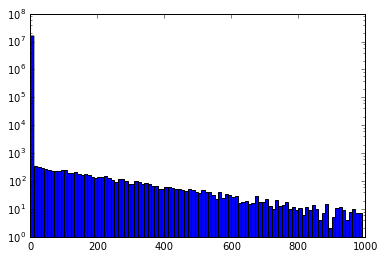

In [109]:
_ = hist(imlev.flatten(),bins=np.arange(0,1000,10),log=True)

In [147]:
np.choose(np.arange(9).reshape(3,3),[np.array([100,0]),np.array([0,0])],mode='clip')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [151]:
np.select?

In [150]:
np.compress?

In [152]:
cv2.dilate?

In [184]:
dialated =cv2.dilate(im,cv2.getStructuringElement(cv2.MORPH_DILATE,(5,5)))

In [185]:
dialated.max()

14368

In [186]:
im.max()

14368

In [164]:
np.sum((im.astype('float')-dialated)>0)

0

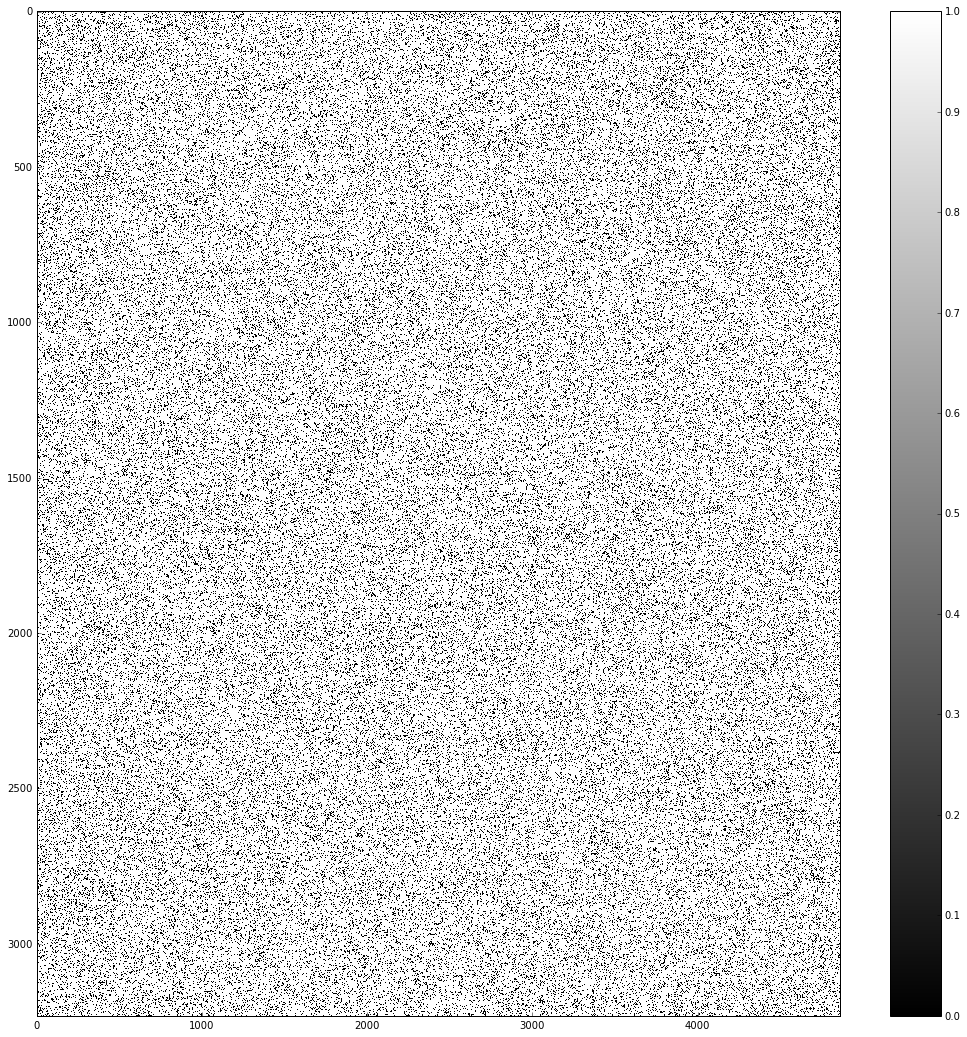

In [187]:
figure(figsize=(18,18))
imshow((im.astype('float')-dialated)<0,aspect='auto',interpolation='nearest',cmap=cm.gray)
colorbar()

In [178]:
cv2.getStructuringElement(cv2.MORPH_DILATE,(3,3))

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [188]:
import sys

In [189]:
sys.path.append('/home/pmchome/pmc-turbo/')

In [422]:
import pmc_camera.star_finding.blobs
reload(pmc_camera.star_finding.blobs)

<module 'pmc_camera.star_finding.blobs' from '/home/pmchome/pmc-turbo/pmc_camera/star_finding/blobs.py'>

In [293]:
b = pmc_camera.star_finding.blobs.find_blobs(imlev.astype('float'),threshold=3000)

In [299]:
3000/450.

6.666666666666667

In [294]:
len(b)

17

In [295]:
b

[Blob(x=197, y=2053, peak=24723.0),
 Blob(x=226, y=4408, peak=9136.0),
 Blob(x=427, y=4637, peak=5406.0),
 Blob(x=437, y=4750, peak=3582.0),
 Blob(x=555, y=4169, peak=6432.0),
 Blob(x=604, y=1965, peak=11594.0),
 Blob(x=730, y=1316, peak=4355.0),
 Blob(x=731, y=4457, peak=7196.0),
 Blob(x=743, y=1679, peak=4747.0),
 Blob(x=818, y=84, peak=3132.0),
 Blob(x=1186, y=1544, peak=3864.0),
 Blob(x=1353, y=1865, peak=6345.0),
 Blob(x=2018, y=1579, peak=3849.0),
 Blob(x=2125, y=3949, peak=20957.0),
 Blob(x=2574, y=3655, peak=3282.0),
 Blob(x=2733, y=1079, peak=7298.0),
 Blob(x=3027, y=3371, peak=6570.0)]

In [223]:
b[0]

Blob(x=197, y=2053, peak=24723)

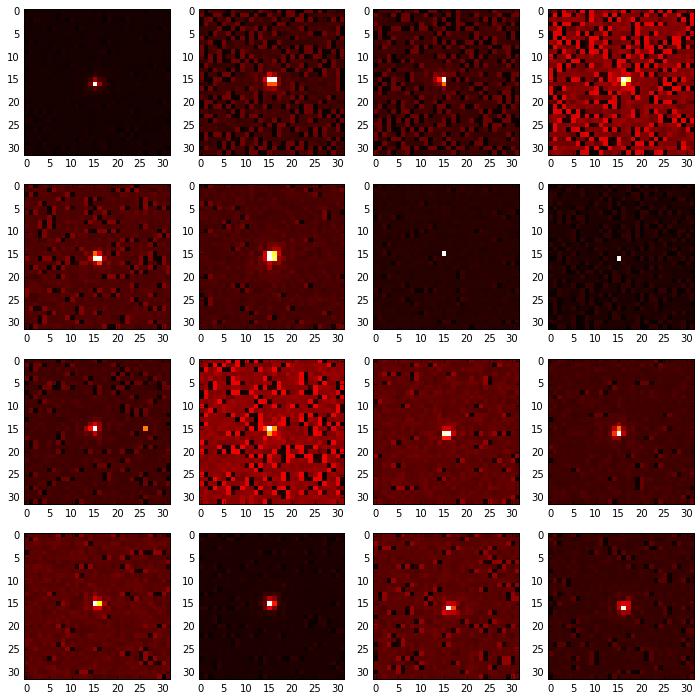

In [298]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax = axs.flatten()[k]
    blob = b[k]
    ax.imshow(im[blob.x-16:blob.x+16,blob.y-16:blob.y+16],cmap=cm.hot,interpolation='nearest')

In [256]:
for blob in b:
    print blob.x,blob.y

197 2053
226 4408
427 4637
437 4750
555 4169
604 1965
730 1316
731 4457
743 1679
818 84
1186 1544
1353 1865
2018 1579
2125 3949
2574 3655
2733 1079
3027 3371


In [257]:
cells.shape

(101, 32, 152, 32)

In [271]:
cells = im.reshape((3232//32,32,4864//32,32))

In [284]:
noise = cells.std(axis=(1,3))

In [273]:
noise.shape

(101, 152)

In [285]:
np.sum(cells==0)

27

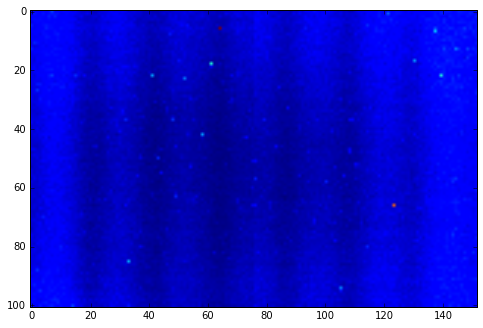

In [291]:
imshow(noise)


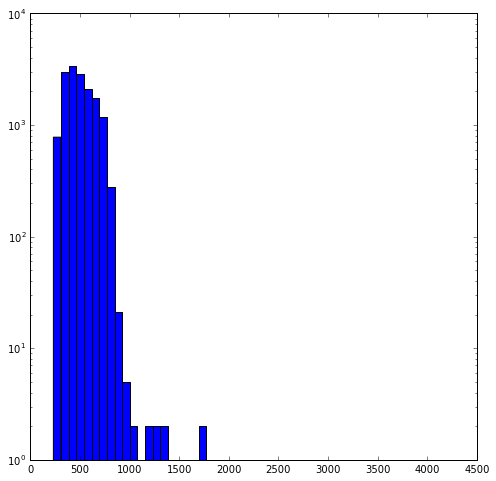

In [287]:
_ = hist(noise.flatten(),bins=50,log=True)

In [288]:
np.median(noise.astype('float'))

476.34989693658736

In [289]:
np.mean(noise)

495.40994421615886

In [306]:
blob = b[1]
stamp = im[blob.x-16:blob.x+16,blob.y-16:blob.y+16]

In [327]:
def gauss2d(params,xgrid,ygrid):
    A,x0,y0,sigmasq,offset = params
    gaussian = A*np.exp(-(((xgrid-x0)**2 + (ygrid-y0)**2)/(2*sigmasq))) + offset
    return gaussian

def objective(params,xgrid,ygrid,zdata):
    gaussian = gauss2d(params,xgrid,ygrid)
    return np.sum(np.abs((zdata-gaussian))**2)

In [312]:
import scipy.optimize

In [366]:
def fit_gauss_2d(data,A0 = None, x0 = None, y0 = None, sigma0 = 1, offset = None):
    if x0 is None:
        x0 = data.shape[0]/2.0
        y0 = data.shape[1]/2.0
    if offset is None:
        offset = data.min()
    if A0 is None:
        A0 = data.ptp()
    init_params = (A0,x0,y0,sigma0**2,offset)
    ygrid,xgrid = np.meshgrid(np.arange(data.shape[1]),np.arange(data.shape[0]))
    return xgrid,ygrid,scipy.optimize.minimize(objective,init_params,args=(xgrid,ygrid,data))

In [345]:
xgrid,ygrid,res = fit_gauss_2d(stamp)

/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


In [325]:
res.message

'Desired error not necessarily achieved due to precision loss.'

In [326]:
res.x

array([  3.70509481e+03,   1.54738829e+01,   1.51641773e+01,
         4.98350680e-01,   2.56217896e+02])

In [332]:
fit0 = gauss2d(res.x,xgrid,ygrid)

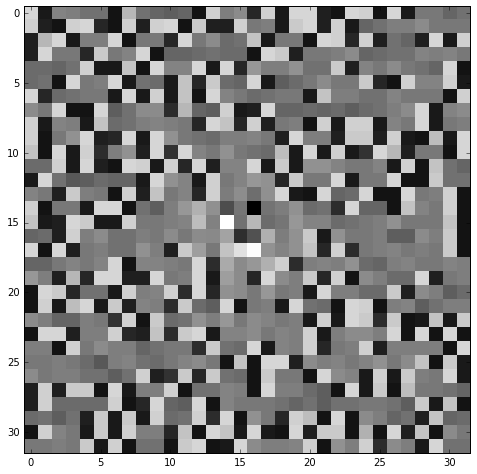

In [333]:
imshow(stamp-gauss2d(res.x,xgrid,ygrid),cmap=cm.gray,interpolation='nearest')

In [309]:
np.meshgrid?

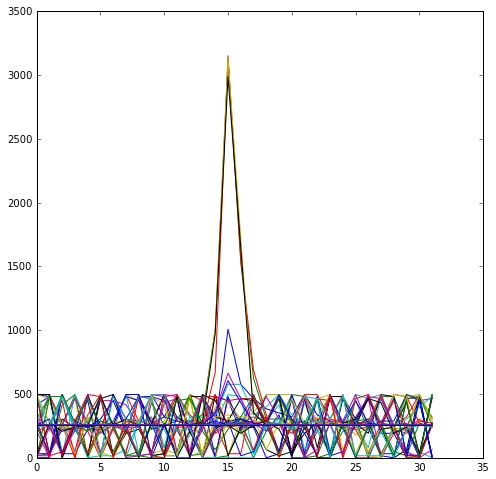

In [334]:
_=plot(stamp)
_=plot(fit0)

/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


IndexError: list index out of range

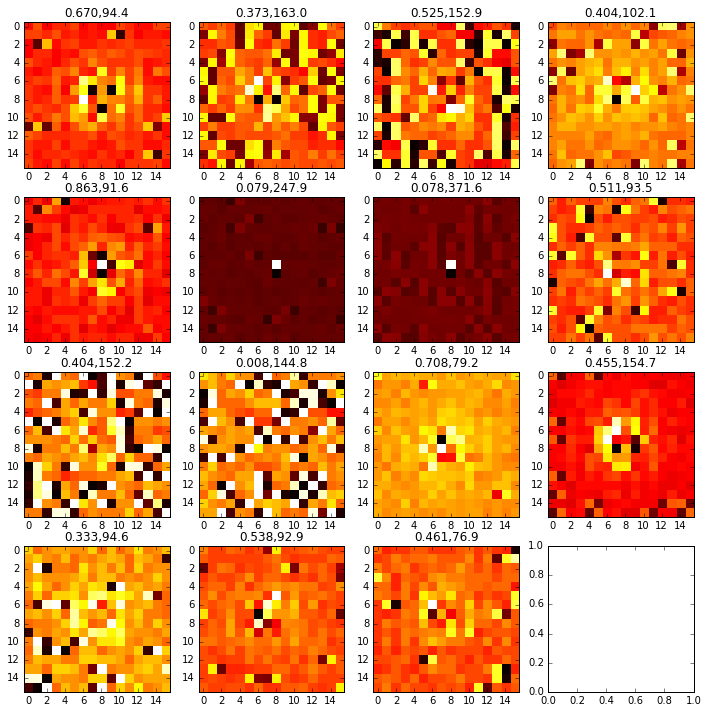

In [402]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax = axs.flatten()[k]
    blob = blobs[k]
    stamp = im[blob.x-8:blob.x+8,blob.y-8:blob.y+8]
    xgrid,ygrid,res = fit_gauss_2d(stamp)
    
    residual = stamp - gauss2d(res.x,xgrid,ygrid)
    ax.imshow(residual,cmap=cm.hot,interpolation='nearest')
    ax.set_title('%.3f,%.1f' % (res.x[3],np.std(residual)))
    #print res.nfev

/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


IndexError: list index out of range

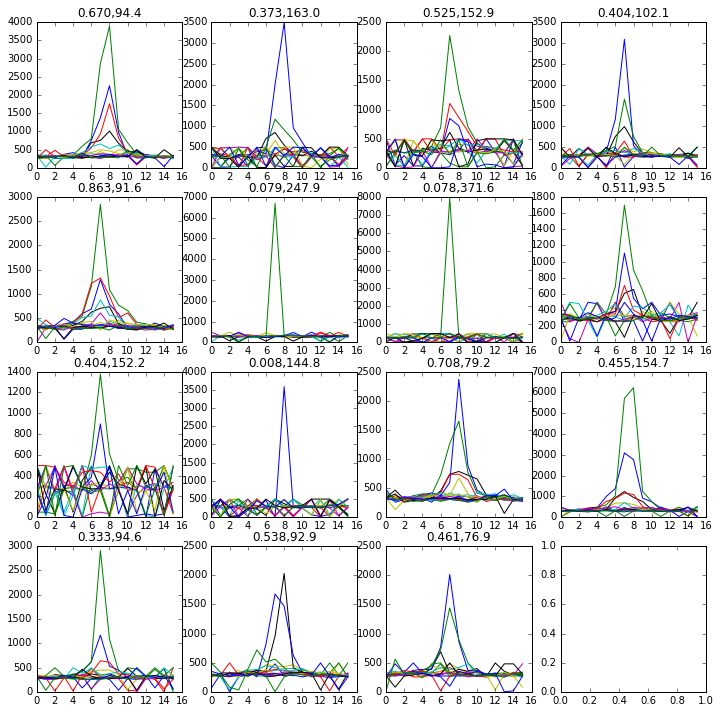

In [404]:
fig,axs = subplots(4,4,figsize=(12,12))
for k in range(16):
    ax = axs.flatten()[k]
    blob = blobs[k]
    stamp = im[blob.x-8:blob.x+8,blob.y-8:blob.y+8]
    xgrid,ygrid,res = fit_gauss_2d(stamp)
    
    residual = stamp - gauss2d(res.x,xgrid,ygrid)
    #ax.imshow(stamp,cmap=cm.hot,interpolation='nearest')
    _ = ax.plot(stamp)
    ax.set_title('%.3f,%.1f' % (res.x[3],np.std(residual)))
    #print res.nfev

In [350]:
blob

Blob(x=2733, y=1079, peak=7298.0)

In [377]:
def process_image(im,blob_threshold=6,kernel_size=8,stamp_size=32):
    #make kernel
    selm = cv2.getGaussianKernel(kernel_size,sigma=2)
    selm = np.outer(selm,selm)
    selm = selm/selm.max()
    selm[0,:] = -1
    selm[:,0] = -1
    selm[-1,:] = -1
    selm[:,-1] = -1
    #convolve
    imlev =  cv2.filter2D(im.astype('int'),-1,selm)
    #calculate noise
    cells = imlev.reshape((imlev.shape[0]//32,32,imlev.shape[1]//32,32))
    noise = np.median(cells.std(axis=(1,3)))
    
    #find blobs
    blobs = pmc_camera.star_finding.blobs.find_blobs(imlev.astype('float32'),threshold=blob_threshold*noise)
    #fit blobs
    for blob in blobs:
        xmin = np.max((blob.x-stamp_size//2,0))
        xmax = np.min((blob.x+stamp_size//2,im.shape[0]-1))
        ymin = np.max((blob.y-stamp_size//2,0))
        ymax = np.min((blob.y+stamp_size//2,im.shape[1]-1))
    
        stamp = im[xmin:xmax,ymin:ymax]
        xgrid,ygrid,result = fit_gauss_2d(stamp)
        blob.sigma = np.sqrt(result.x[3])
    return blobs
    

In [399]:
blobs = process_image(im,blob_threshold=5,kernel_size=8)

/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/home/gjones/miniconda2/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square


In [400]:
len(blobs)

15

In [396]:
blobs

[Blob(x=206,y=2057,peak=3778.0,sigma=2.414,
 Blob(x=731,y=4457,peak=4320.0,sigma=0.281,
 Blob(x=2134,y=3947,peak=9063.0,sigma=1.844]

In [380]:
np.median([(b.sigma) for b in blobs])

0.62017202269209781

In [533]:
im = np.load('/home/pmcroot/data1/2016-08-18_50mm_star_focus_test/2016-08-18_234933_focus_step_0158.npz')['image']

In [544]:
reload(pmc_camera.star_finding.blobs)

<module 'pmc_camera.star_finding.blobs' from '/home/pmchome/pmc-turbo/pmc_camera/star_finding/blobs.py'>

In [589]:
blobs = pmc_camera.star_finding.blobs.process_image(im,blob_threshold=8,kernel_size=16,kernel_sigma=1.75,fit_blobs=False)

10.1399625964


In [590]:
len(blobs)

54

In [591]:
blobs[0]

Blob(x=6,y=230,peak=94.0,sigma=None

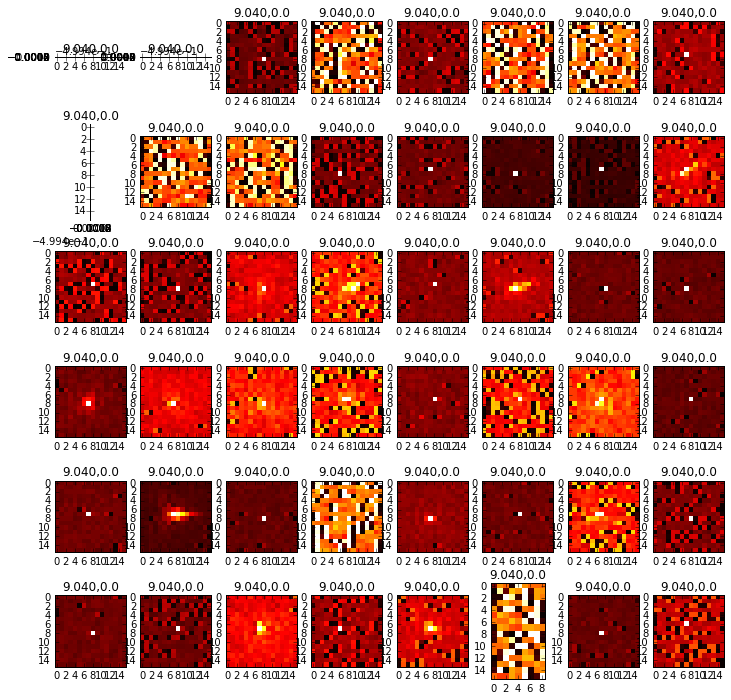

In [592]:
fig,axs = subplots(6,8,figsize=(12,12))
for k in range(len(axs.flatten())):
    ax = axs.flatten()[k]
    blob = blobs[k]
    stamp = im[blob.x-8:blob.x+8,blob.y-8:blob.y+8]
    #xgrid,ygrid,res = fit_gauss_2d(stamp)
    
    #residual = stamp - gauss2d(res.x,xgrid,ygrid)
    ax.imshow(stamp,cmap=cm.hot,interpolation='nearest')
    ax.set_title('%.3f,%.1f' % (res.x[3],0))
    #print res.nfev

In [92]:
x = np.array([1,2,3,4,4.1,5,6])

In [95]:
x[np.flatnonzero(np.diff(x)<.5)]

array([ 4.])